In [1]:
import sqlite3
import pandas as pd
import pandasql as ps
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")

In [2]:
# data uplode
df = pd.read_csv('F1DriversDataset.csv')

In [3]:
# connect to sqlite
connection = sqlite3.connect('demo2.db')

In [4]:
# load data file to sqlite
df.to_sql('F1DriversDataset',connection,if_exists= 'replace')

868

In [5]:
# close connection
connection.close()

# Data Cleaning

In [6]:
# Check for any missing values
print(df.isnull().sum())

Driver                  0
Nationality             0
Seasons                 0
Championships           0
Race_Entries            0
Race_Starts             0
Pole_Positions          0
Race_Wins               0
Podiums                 0
Fastest_Laps            0
Points                  0
Active                  0
Championship Years    834
Decade                  0
Pole_Rate               0
Start_Rate              0
Win_Rate                0
Podium_Rate             0
FastLap_Rate            0
Points_Per_Entry        0
Years_Active            0
Champion                0
dtype: int64


In [7]:
# Check for any duplicates
print(df.duplicated().sum())

0


# Exploratory Data Analysis   

In [9]:
df.head(5)

,Driver,Nationality,Seasons,Championships,Race_Entries,Race_Starts,Pole_Positions,Race_Wins,Podiums,Fastest_Laps,...,Championship Years,Decade,Pole_Rate,Start_Rate,Win_Rate,Podium_Rate,FastLap_Rate,Points_Per_Entry,Years_Active,Champion
0,Carlo Abate,Italy,"[1962, 1963]",0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,NaN,1960,0.0,0.000000,0.0,0.0,0.0,0.000000,2,False
1,George Abecassis,United Kingdom,"[1951, 1952]",0.0,2.0,2.0,0.0,0.0,0.0,0.0,...,NaN,1950,0.0,1.000000,0.0,0.0,0.0,0.000000,2,False
2,Kenny Acheson,United Kingdom,"[1983, 1985]",0.0,10.0,3.0,0.0,0.0,0.0,0.0,...,NaN,1980,0.0,0.300000,0.0,0.0,0.0,0.000000,2,False
3,Andrea de Adamich,Italy,"[1968, 1970, 1971, 1972, 1973]",0.0,36.0,30.0,0.0,0.0,0.0,0.0,...,NaN,1970,0.0,0.833333,0.0,0.0,0.0,0.166667,5,False
4,Philippe Adams,Belgium,[1994],0.0,2.0,2.0,0.0,0.0,0.0,0.0,...,NaN,1990,0.0,1.000000,0.0,0.0,0.0,0.000000,1,False


In [10]:
df.columns

Index(['Driver', 'Nationality', 'Seasons', 'Championships', 'Race_Entries',
       'Race_Starts', 'Pole_Positions', 'Race_Wins', 'Podiums', 'Fastest_Laps',
       'Points', 'Active', 'Championship Years', 'Decade', 'Pole_Rate',
       'Start_Rate', 'Win_Rate', 'Podium_Rate', 'FastLap_Rate',
       'Points_Per_Entry', 'Years_Active', 'Champion'],
      dtype='object')

In [11]:
df.describe()

,Championships,Race_Entries,Race_Starts,Pole_Positions,Race_Wins,Podiums,Fastest_Laps,Points,Decade,Pole_Rate,Start_Rate,Win_Rate,Podium_Rate,FastLap_Rate,Points_Per_Entry,Years_Active
count,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000
mean,0.084101,29.917051,27.694700,1.244240,1.247696,3.756912,1.261521,55.849459,1972.223502,0.011471,0.779824,0.011050,0.041389,0.011894,0.479158,3.664747
std,0.524883,53.780150,52.876476,6.347512,6.491921,14.432826,5.413644,265.968614,20.201084,0.046544,0.324303,0.043579,0.106457,0.043514,1.213826,3.501761
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1960.000000,0.000000,0.666667,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,7.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1970.000000,0.000000,0.962251,0.000000,0.000000,0.000000,0.000000,2.000000
75%,0.000000,29.250000,26.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1982.500000,0.000000,1.000000,0.000000,0.000000,0.000000,0.382517,5.000000
max,7.000000,359.000000,356.000000,103.000000,103.000000,191.000000,77.000000,4415.500000,2020.000000,0.557692,1.000000,0.461538,1.000000,0.500000,14.197749,19.000000


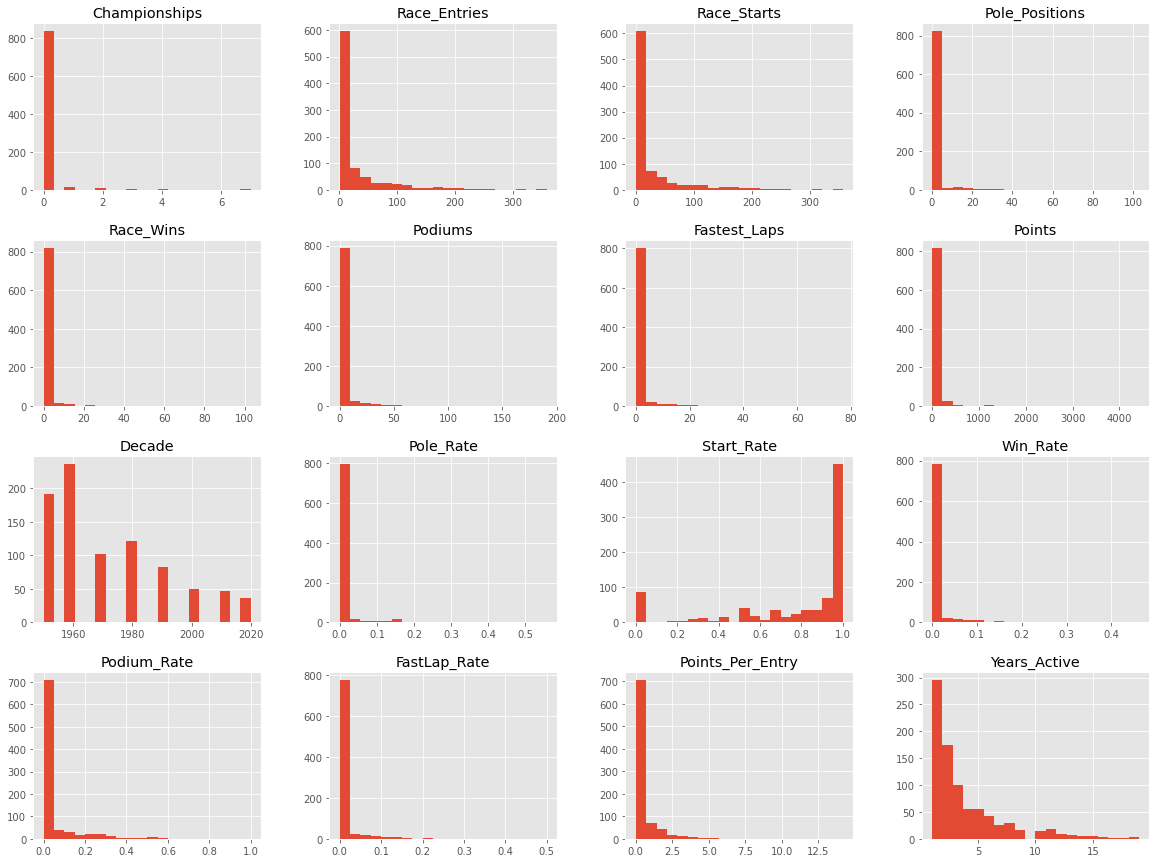

In [12]:
df.hist(bins=20, figsize=(20,15))
plt.show()

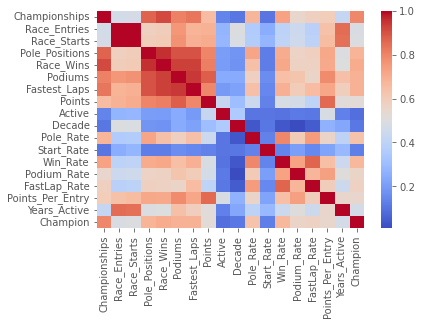

In [13]:
# Heatmap of the correlation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.show()

In [17]:
# Distribution of each column
query1 = """
SELECT COUNT(*) AS Count, AVG(Seasons) AS Avg_Seasons, AVG(Championships) AS Avg_Championships,
       AVG(Race_Entries) AS Avg_Race_Entries, AVG(Race_Starts) AS Avg_Race_Starts,
       AVG(Pole_Positions) AS Avg_Pole_Positions, AVG(Race_Wins) AS Avg_Race_Wins,
       AVG(Podiums) AS Avg_Podiums, AVG(Fastest_Laps) AS Avg_Fastest_Laps,
       AVG(Points) AS Avg_Points, AVG(Pole_Rate) AS Avg_Pole_Rate, AVG(Start_Rate) AS Avg_Start_Rate,
       AVG(Win_Rate) AS Avg_Win_Rate, AVG(Podium_Rate) AS Avg_Podium_Rate, AVG(FastLap_Rate) AS Avg_FastLap_Rate,
       AVG(Points_Per_Entry) AS Avg_Points_Per_Entry, AVG(Years_Active) AS Avg_Years_Active
FROM df"""

In [18]:
q1 = (ps.sqldf(query1))

In [19]:
q1

,Count,Avg_Seasons,Avg_Championships,Avg_Race_Entries,Avg_Race_Starts,Avg_Pole_Positions,Avg_Race_Wins,Avg_Podiums,Avg_Fastest_Laps,Avg_Points,Avg_Pole_Rate,Avg_Start_Rate,Avg_Win_Rate,Avg_Podium_Rate,Avg_FastLap_Rate,Avg_Points_Per_Entry,Avg_Years_Active
0,868,0.0,0.084101,29.917051,27.6947,1.24424,1.247696,3.756912,1.261521,55.849459,0.011471,0.779824,0.01105,0.041389,0.011894,0.479158,3.664747


In [103]:
#Number of Championships
query2 = """SELECT Driver,Championships  
             FROM df 
             WHERE Championships  >= 1 
             ORDER BY Championships DESC 
             LIMIT (10)"""

In [21]:
q2 = (ps.sqldf(query2))

<AxesSubplot:title={'center':'Championships'}, xlabel='Driver'>

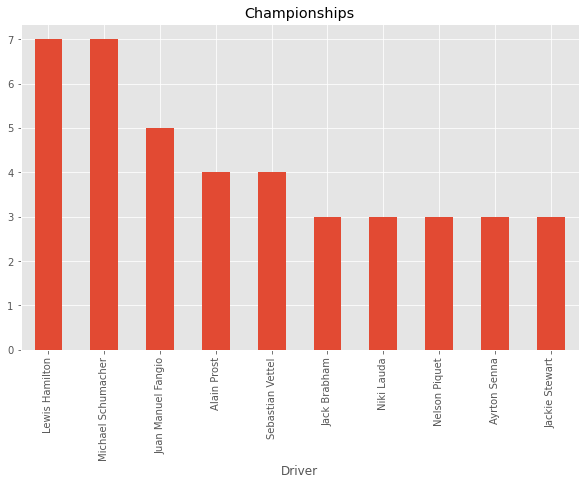

In [22]:
q2.plot(kind="bar",x ='Driver' ,title ='Championships',width = 0.5,figsize=(10,6),legend=False)

In [23]:
#Drivers by Nationality
query3 = """SELECT Nationality,count(*) as Drivers 
                FROM df 
                GROUP BY Nationality 
                ORDER BY Drivers desc 
                limit(10)"""

In [24]:
q3 = (ps.sqldf(query3))

<AxesSubplot:title={'center':'Drivers by Nationality'}, xlabel='Nationality'>

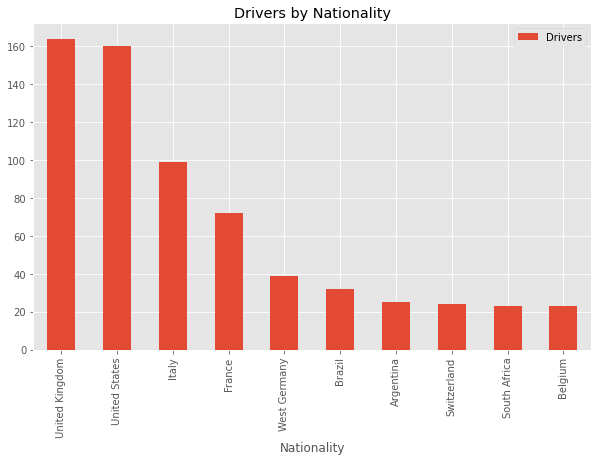

In [106]:
q3.plot(kind="bar", x = 'Nationality' , y = 'Drivers' ,title ='Drivers by Nationality',width = 0.5,figsize=(10,6))


In [28]:
#Pole Positions & Race Wins
query4 = "SELECT Pole_Positions,Race_Wins FROM df GROUP BY Driver ORDER BY Pole_Positions DESC limit(20)"

In [29]:
q4 = (ps.sqldf(query4))

<AxesSubplot:title={'center':'Pole Positions & Race Wins'}>

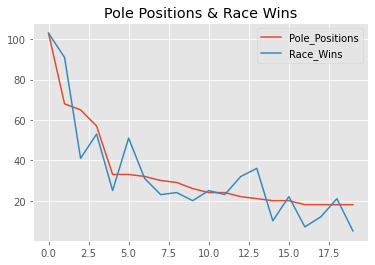

In [30]:
q4.plot(title = 'Pole Positions & Race Wins')

In [31]:
# Create a new feature called 'Points_Per_Race_Start'
df['Points_Per_Race_Start'] = df['Points'] / df['Race_Starts']

In [32]:
# Create a new feature called 'Podium_Rate_Per_Race'
df['Podium_Rate_Per_Race'] = df['Podiums'] / df['Race_Starts']


Points_Per_Race_Start: This feature measures the average number of points a driver earns per race start.
It helps to normalize the total points earned by a driver based on the number of races they have started.

Podium_Rate_Per_Race: This feature represents the proportion of races in which a driver has finished on the podium.
It provides insight into how often a driver is able to achieve a top-three finish relative to the number of races they have started.

By creating these new features, we can gain a better understanding of each driver's performance and compare them more accurately.

In [33]:
# new features
df.head()

,Driver,Nationality,Seasons,Championships,Race_Entries,Race_Starts,Pole_Positions,Race_Wins,Podiums,Fastest_Laps,...,Pole_Rate,Start_Rate,Win_Rate,Podium_Rate,FastLap_Rate,Points_Per_Entry,Years_Active,Champion,Points_Per_Race_Start,Podium_Rate_Per_Race
0,Carlo Abate,Italy,"[1962, 1963]",0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,2,False,NaN,NaN
1,George Abecassis,United Kingdom,"[1951, 1952]",0.0,2.0,2.0,0.0,0.0,0.0,0.0,...,0.0,1.000000,0.0,0.0,0.0,0.000000,2,False,0.0,0.0
2,Kenny Acheson,United Kingdom,"[1983, 1985]",0.0,10.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.300000,0.0,0.0,0.0,0.000000,2,False,0.0,0.0
3,Andrea de Adamich,Italy,"[1968, 1970, 1971, 1972, 1973]",0.0,36.0,30.0,0.0,0.0,0.0,0.0,...,0.0,0.833333,0.0,0.0,0.0,0.166667,5,False,0.2,0.0
4,Philippe Adams,Belgium,[1994],0.0,2.0,2.0,0.0,0.0,0.0,0.0,...,0.0,1.000000,0.0,0.0,0.0,0.000000,1,False,0.0,0.0


In [104]:
query7 = """SELECT Driver, points,Points_Per_Race_Start,Podium_Rate_Per_Race
            FROM df
            ORDER BY Podium_Rate_Per_Race desc """

In [53]:
q7 = (ps.sqldf(query7))

In [54]:
q7.head(20)

,Driver,Points,Points_Per_Race_Start,Podium_Rate_Per_Race
0,George Amick,6.00,6.000000,1.000000
1,Dorino Serafini,3.00,3.000000,1.000000
2,Luigi Fagioli,28.00,4.000000,0.857143
3,Juan Manuel Fangio,245.00,4.803922,0.686275
4,Lewis Hamilton,4415.50,14.197749,0.614148
5,Nino Farina,115.33,3.494848,0.606061
6,José Froilán González,72.14,2.774615,0.576923
7,Alain Prost,768.50,3.861809,0.532663
8,Alberto Ascari,107.64,3.363750,0.531250
9,Michael Schumacher,1566.00,5.117647,0.506536


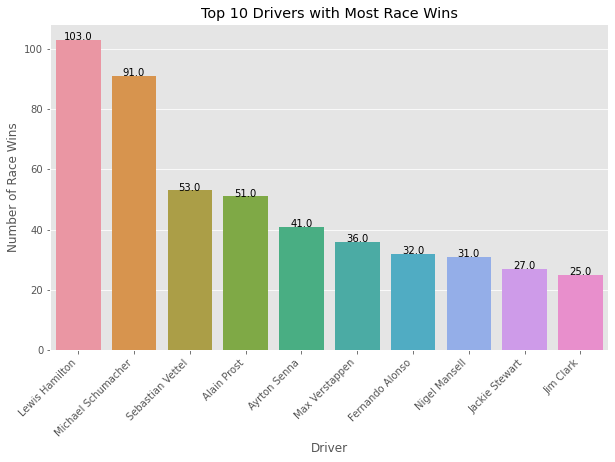

In [79]:
# Top 10 drivers with the most race wins
top_10_wins = df.sort_values(by='Race_Wins', ascending=False)[:10]
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_wins, x='Driver', y='Race_Wins',)
plt.title('Top 10 Drivers with Most Race Wins')
plt.xlabel('Driver')
plt.ylabel('Number of Race Wins')
plt.xticks(rotation=45, ha='right')

for i, v in enumerate(top_10_wins['Race_Wins']):
    plt.text(i, v, str(v), color='black', ha="center")

plt.show()

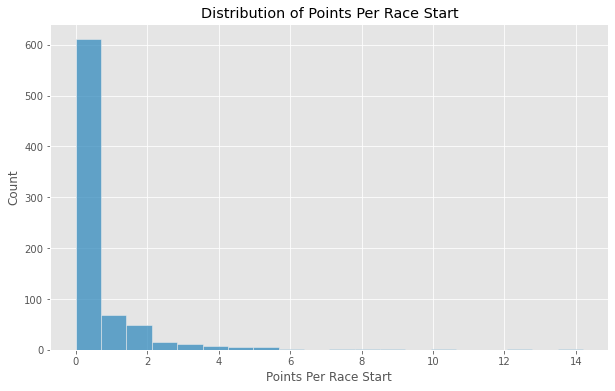

In [78]:
#Histogram of the Points_Per_Race_Start column
plt.figure(figsize=(10, 6))
sns.histplot(df['Points_Per_Race_Start'], bins=20)
plt.title('Distribution of Points Per Race Start')
plt.xlabel('Points Per Race Start')
plt.ylabel('Count')
plt.show()

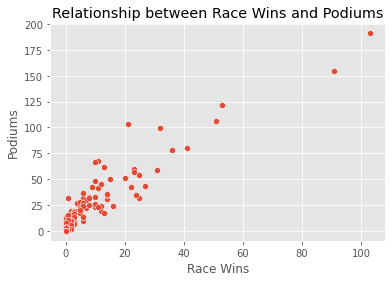

In [93]:
# scatter plot of 'Race_Wins' against 'Podiums'
sns.scatterplot(data=df, x='Race_Wins', y='Podiums')
plt.title('Relationship between Race Wins and Podiums')
plt.xlabel('Race Wins')
plt.ylabel('Podiums')
plt.show()

the relationship between the number of race wins and the number of podium finishes for each driver in the dataset.

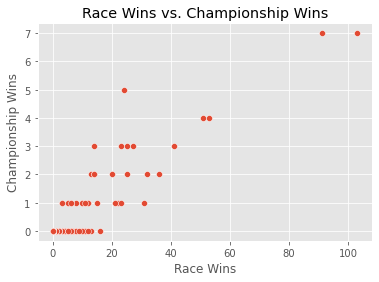

In [96]:
#The correlation between Race Wins and Championship Wins
sns.scatterplot(data=df, x='Race_Wins', y='Championships')
plt.title('Race Wins vs. Championship Wins')
plt.xlabel('Race Wins')
plt.ylabel('Championship Wins')
plt.show()

I've thoroughly analyzed a dataset containing information about the performance of Formula One drivers over multiple seasons. After cleaning and preprocessing the data, I explored various features such as the number of wins, points, podiums, and championships won by the drivers, as well as their win and podium rates per race start.
Through data visualization and statistical analysis, I was able to uncover interesting insights about the drivers and their performance. For example, I found that the top 10 drivers with the most race wins include legendary names such as Michael Schumacher, Lewis Hamilton, and Alain Prost.
Overall, this dataset provided a rich source of information about the history of Formula One and its most successful drivers. By leveraging various data analysis techniques, I was able to gain a deeper understanding of the data and uncover valuable insights that could be used to inform future decisions in the sport.
